**A short tutorial using GDAL in Python**

**GDAL** is a translator library for raster and vector geospatial data formates that is released under an MIT style Open Source License by the Open Source Geospatial Foundation. As a library, it presents a single raster abstract data model and single vector abstract data model to the calling application for all supported formates. It also comes with a variety of useful command l ine utilities for data translation and processing.

**GDAL** (Geospatial Data Abstraction Library) is an open-source library used for reading, writing, and processing raster and vector geospatial data formats. It supports a wide range of file formats and provides powerful tools for geospatial data manipulation, making it a key tool in GIS, remote sensing, and mapping applications. (_description from ChatGPT4o_)



# Install/Load GDAL

In [ ]:
'''
How to Install GDAL, matplotlib and numpy using pip. 
This line of code is commented out because if you have 
loaded the environment from the environment file (ATUR-WIKI.yml) they should already be installed.
If you have not loaded the environment or want to create your own
uncomment the line below and run it
'''

#!pip install gdal matplotlib numpy


> **Notes**: 
> * anything with a `#` will not be run, usually reserved for commenting code
> * the `!` at the beginning of the line of code is used to run shell (or system commands) directly from your notebook
> * You do not want to run the line of code or chunk that installs something over and over. The line above can be run once, it will install gdal in your environment, then you can comment it out so it does not run again when you re-run the notebook.

## How to Import GDAL

In [7]:
## after running the line above gdal is installed, but you still need to load it
from osgeo import gdal
gdal.UseExceptions()  # This will enable exceptions.

## Load some other useful libraries

**numpy**

NumPy is a powerful Python library used for numerical computing. It provides support for large, multi-dimensional arrays and matrices, along with a wide range of mathematical functions to perform operations on these arrays efficiently. (_description from ChatGPT4o_)

**matplotlib**

Matplotlib is a popular Python library for creating static, interactive, and animated visualizations. It is particularly useful for generating plots, graphs, and charts from data, making it a key tool for data analysis and visualization. (_description from ChatGPT4o_)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#  Open a tif stored at a URL with GDAL

In [28]:
# URL of the .tif file
tif_url = 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/TIFF/historical/n35w111/USGS_1_n35w111_20240402.tif'

# Open the file using GDAL
dataset = gdal.Open(tif_url)

# Check if the file was successfully opened
if dataset is None:
    print("Failed to open the file!")
else:
    print("File opened successfully!")

File opened successfully!


#  Exploring Basic Information

In [10]:
# Get the raster band (assuming this is a single-band DEM)
band = dataset.GetRasterBand(1)

# Get some information about the dataset
print(f"Raster Size: {dataset.RasterXSize} x {dataset.RasterYSize}")
print(f"Number of Bands: {dataset.RasterCount}")
print(f"Data Type: {gdal.GetDataTypeName(band.DataType)}")
print(f"Projection: {dataset.GetProjection()}")

# Explore the geotransform
geotransform = dataset.GetGeoTransform()
print(f"GeoTransform: {geotransform}")


Raster Size: 3612 x 3612
Number of Bands: 1
Data Type: Float32
Projection: GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4269"]]
GeoTransform: (-111.00166666698249, 0.000277777777786999, 0.0, 35.001666667083896, 0.0, -0.00027777777803598015)


## PYTHON SYNTAX TIPS: f-STRINGS

In Python, f-strings (formatted string literals) are a concise and efficient way to embed expressions inside string literals. Introduced in Python 3.6, they allow you to insert variables or expressions directly within curly braces `{}` inside a string prefixed by the letter `f`, which automatically evaluates and formats the expressions.


In [33]:
## f-STRINGS EXAMPLE

name = "Alice"
age = 30
greeting = f"Hello, my name is {name} and I am {age} years old."
print(greeting)


Hello, my name is Alice and I am 30 years old.


##  Reading the data into a NumPy Array

In [14]:
# Read the raster band as a NumPy array
elevation_data = band.ReadAsArray()

# Check the shape of the data
print(f"Data Shape: {elevation_data.shape} 1/3 arcsecond")
print(f"Min Value: {elevation_data.min()} meters")
print(f"Max Value: {elevation_data.max()} meters")

# 1/3 arcsecond raster = 10m x 10m pixel size

Data Shape: (3612, 3612) 1/3 arcsecond
Min Value: 1324.57958984375 meters
Max Value: 2410.233154296875 meters


#  Visualizing the Data Using Matplotlib

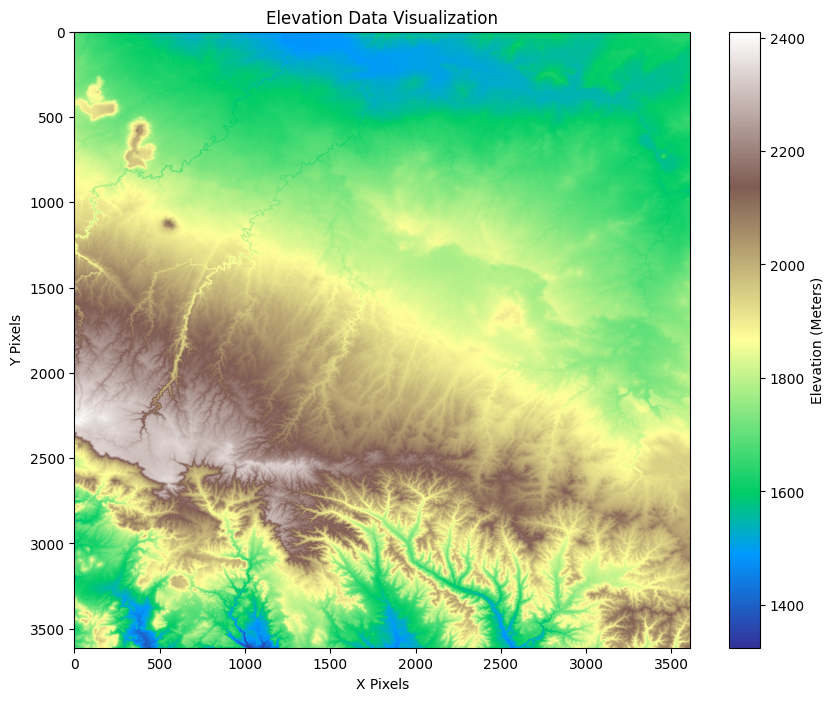

In [15]:
# Plot the elevation data using a colormap 
plt.figure(figsize = (10,8))
plt.imshow(elevation_data, cmap = 'terrain')
plt.colorbar(label='Elevation (Meters)')
plt.title('Elevation Data Visualization')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.show()

#  Exploring More GDAL Functionalities

##  Get Metadata

In [16]:
# Get metadata for the dataset
metadata = dataset.GetMetadata()
print(f"Metadata: {metadata}")


Metadata: {'BandDefinitionKeyword': '*', 'DataType': '*', 'AREA_OR_POINT': 'Area'}


## Getting Specific Pixel Values

To retreive the elevation value at a specific pixel location

In [17]:
# Example: Get the elevation at pixel (500,500)
x_pixel, y_pixel = 500, 500
elevation_value = elevation_data[y_pixel,x_pixel]
print(f" Elevation at pixel ({x_pixel},{y_pixel}): {elevation_value} meters")

 Elevation at pixel (500,500): 1695.1978759765625 meters


## Converting Pixel coordinates to Geospatial Coodrinates

You can use the `GeoTransform` to convert from pixel coordinates to real-world coordinates.

In [19]:
# create a function to get geographic coordinates from pixel coordinates
def pixel_to_geo(x_pixel, y_pixel, geotransform):
    x_geo = geotransform[0] + x_pixel * geotransform[1] + y_pixel * geotransform[2]
    y_geo = geotransform[3] + x_pixel * geotransform[4] + y_pixel * geotransform[5]
    return x_geo, y_geo

# Example: Convert pixel (500, 500) to geographic coordinates
x_geo, y_geo = pixel_to_geo(500, 500, geotransform)
print(f"Geographic Coordinates: (W {x_geo} , N {y_geo})")


Geographic Coordinates: (W -110.86277777808898 , N 34.862777778065904)


In [25]:
## close dataset

dataset = None

## Export raster as Cloud-optimized-geotiff COG

**What are COGs and Why should I care?**

A Cloud Optimized GeoTIFF (COG) is a type of GeoTIFF file that has been optimized for efficient access and use in cloud-based environments. It allows users to access and stream portions of the data without needing to download the entire file, making it ideal for large geospatial datasets used in remote sensing, GIS, and mapping applications. Here are the key features and benefits of a COG:

**Key Features:**
1. Internal Tiling:

* A COG is internally divided into smaller, equally-sized tiles, which allow for selective access to portions of the image. This structure enables the reading of only the necessary tiles for a particular region or zoom level.

2. Pyramidal Layers (Overviews):

* It contains lower-resolution overviews or pyramids, which allow for quick access and visualization of the data at multiple zoom levels, much like how online map services work.

3. Efficient Metadata Placement:

* The metadata (such as georeferencing information and overviews) is placed at the beginning of the file, allowing clients to read metadata quickly without scanning the entire file. This enhances performance when accessing or visualizing the data in cloud environments.

4. HTTP Range Requests:

* COGs are designed to work efficiently over HTTP using range requests, meaning that clients can request specific byte ranges of the file to load only necessary data, rather than downloading the entire file. This is crucial for working with very large datasets in cloud storage.
---

**Benefits:**

1. Efficient Data Access:

* With a COG, only the relevant parts of the image are accessed (e.g., a specific region or zoom level), which reduces data transfer costs and speeds up analysis in cloud environments like Amazon S3 or Google Cloud Storage.
  
2. Cloud-Friendly:

* COGs are ideal for cloud-based workflows, enabling on-the-fly processing and analysis directly from cloud storage without the need for data to be downloaded to a local machine.

3. Interoperability:

* COGs are still standard GeoTIFF files, meaning they can be read by most GIS and remote sensing software. However, their cloud-optimized structure makes them more efficient for modern, web-based applications.

4. Scalability:

* Since COGs allow for selective data access, they are highly scalable and work well with very large datasets (hundreds of gigabytes or terabytes in size).

  (_description from ChatGPT4o_)

> **Key Parameters in gdal.TranslateOptions**:


> `format='COG'`: Specifies the output format as a Cloud Optimized GeoTIFF.
> `TILING_SCHEME=DEFAULT`: Ensures the raster is tiled, which is a key requirement for COG.
> `COMPRESS=LZW`: Optional compression (e.g., LZW, DEFLATE, or JPEG), which reduces file size without sacrificing much performance.
> `BLOCKSIZE=512`: Defines the tile size for internal tiling. Common sizes are 256 or 512 pixels.
> `OVERVIEWS=IGNORE_EXISTING`: Ensures overviews are generated from scratch, which are used to improve performance at different zoom levels.
> `BIGTIFF=IF_SAFER`: Ensures the file is saved as a BigTIFF if necessary

In [32]:

# URL of the .tif file
tif_url = 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/TIFF/historical/n35w111/USGS_1_n35w111_20240402.tif'

# Open the file using GDAL
dataset = gdal.Open(tif_url)

# Specify output location and filename
output_cog = 'Outputs/output_cog.tif'

# Define the options for creating a COG
translate_options = gdal.TranslateOptions(
    format='COG',  # Set format to COG
    creationOptions=[
        'COMPRESS=LZW',  # Optional: Compression to reduce file size
        'BLOCKSIZE=512',  # Blocksize for internal tiling (e.g., 512x512 tiles)
        'OVERVIEWS=IGNORE_EXISTING',  # Use this to generate overviews from scratch
        'BIGTIFF=IF_SAFER'  # Ensures the file is saved as a BigTIFF if necessary
    ]
)

# Create the Cloud Optimized GeoTIFF using gdal.Translate
gdal.Translate(output_cog, dataset, options=translate_options)

print(f"COG created at: {output_cog}")

# Close the dataset
dataset = None


COG created at: Outputs/output_cog.tif
